In [ ]:
from google.colab import files
uploaded = files.upload()


Saving online_retail.csv to online_retail (1).csv


In [ ]:
!pip install ipython-sql


In [ ]:
import pandas as pd
import sqlite3
%reload_ext sql
%sql sqlite://


# Retail Analysis Project
## Deborah Atsagbede

*30th July, 2024*

## Introduction

Welcome to my exploration of an Online Retail dataset! In this analysis, I will delve into the intricate world of eCommerce sales to uncover key trends, customer preferences, and potential areas for growth. By using Google Colab and utilizing tools such as SQL, and Python, I aim to transform raw data into actionable insights. This project not only demonstrates my technical prowess in data analysis but also aligns with my aspirations to contribute to the team's success by leveraging data to drive strategic decisions and optimize their performance. Below is the link to the data source I have acquired from Kaggle.
<https://www.kaggle.com/datasets/thedevastator/online-retail-transaction-data>

## Table of Content
1. Data Acquisition
2. Data Analysis and Cleaning
3. Data Visualization
4. Conclusion

#Data Acquisition

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['online_retail (1).csv']))

In [ ]:
conn = sqlite3.connect('retail.db')

# Load the DataFrame into an SQLite table
df.to_sql('retail', conn, index=False, if_exists='replace')

541909

In [ ]:
query = 'SELECT * FROM retail LIMIT 5'
result = pd.read_sql_query(query, conn)
result

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Connect to the SQLite database
%sql sqlite:///retail.db

#Data Analysis and Cleaning

In [ ]:
# Checking the data types of the columns in the SQL table
%sql PRAGMA table_info(retail);

   sqlite://
 * sqlite:///retail.db
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,InvoiceNo,TEXT,0,None,0
2,StockCode,TEXT,0,None,0
3,Description,TEXT,0,None,0
4,Quantity,INTEGER,0,None,0
5,InvoiceDate,TEXT,0,None,0
6,UnitPrice,REAL,0,None,0
7,CustomerID,REAL,0,None,0
8,Country,TEXT,0,None,0


In [ ]:
#Create a new column called Total and check if it's added
%%sql
ALTER TABLE retail ADD COLUMN Total REAL;
UPDATE retail SET Total = ROUND( Quantity * UnitPrice, 1);
PRAGMA table_info(retail)

   sqlite://
 * sqlite:///retail.db
Done.
541909 rows affected.
Done.


cid,name,type,notnull,dflt_value,pk
0,index,INTEGER,0,None,0
1,InvoiceNo,TEXT,0,None,0
2,StockCode,TEXT,0,None,0
3,Description,TEXT,0,None,0
4,Quantity,INTEGER,0,None,0
5,InvoiceDate,TEXT,0,None,0
6,UnitPrice,REAL,0,None,0
7,CustomerID,REAL,0,None,0
8,Country,TEXT,0,None,0
9,Total,REAL,0,None,0


In [ ]:
#dropping rows that are not useful
%%sql
DELETE FROM retail WHERE UnitPrice<=0

   sqlite://
 * sqlite:///retail.db
0 rows affected.


[]

In [ ]:
#finding the item with the highest purchase
%%sql
SELECT StockCode, UnitPrice,  Description, MAX(Quantity) FROM retail

   sqlite://
 * sqlite:///retail.db
Done.


StockCode,UnitPrice,Description,MAX(Quantity)
23843,2.08,"PAPER CRAFT , LITTLE BIRDIE",80995


In [ ]:
#finding the count of items cheaper than the most purchased item
%%sql
SELECT DISTINCT COUNT(StockCode) as 'Number of Items Cheaper than the Most Purchased Item'
FROM retail
WHERE UnitPrice<2.08

   sqlite://
 * sqlite:///retail.db
Done.


Number of Items Cheaper than the Most Purchased Item
252969


So far, we can see that the most purchased item with StockCode 23843, is cheap. However, it is not purchased because it's the cheapest item in the store. There are way more cheaper items as shown in the query above. I'll further explore the most purchased item to see if there's any relation with the months of purchase and if it contributes to revenue at all

In [ ]:
#Adding the column Month to the table
%%sql
ALTER TABLE retail ADD COLUMN Month TEXT;
UPDATE retail
SET Month = CASE
    WHEN substr(InvoiceDate, 1, 2) = '1/' THEN 'January'
    WHEN substr(InvoiceDate, 1, 2) = '2/' THEN 'February'
    WHEN substr(InvoiceDate, 1, 2) = '3/' THEN 'March'
    WHEN substr(InvoiceDate, 1, 2) = '4/' THEN 'April'
    WHEN substr(InvoiceDate, 1, 2) = '5/' THEN 'May'
    WHEN substr(InvoiceDate, 1, 2) = '6/' THEN 'June'
    WHEN substr(InvoiceDate, 1, 2) = '7/' THEN 'July'
    WHEN substr(InvoiceDate, 1, 2) = '8/' THEN 'August'
    WHEN substr(InvoiceDate, 1, 2) = '9/' THEN 'September'
    WHEN substr(InvoiceDate, 1, 2) = '10' THEN 'October'
    WHEN substr(InvoiceDate, 1, 2) = '11' THEN 'November'
    WHEN substr(InvoiceDate, 1, 2) = '12' THEN 'December'
END

   sqlite://
 * sqlite:///retail.db
Done.
539392 rows affected.


[]

In [ ]:
#Adding the column Year to the SQL table retail
%%sql
ALTER TABLE retail ADD COLUMN Year INTEGER;
UPDATE retail
SET Year = substr(InvoiceDate, length(InvoiceDate) - 8, 4)


   sqlite://
 * sqlite:///retail.db
Done.
539392 rows affected.


[]

In [ ]:
#Exploring the most purchased itemn
%%sql
SELECT * FROM retail where StockCode=23843 group by Month

   sqlite://
 * sqlite:///retail.db
Done.


index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month,Year
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,168469.6,December,2011


The query above shows that the most purchased item was only a one-time purchase by a customer so it's not a popular product. Further analysis is needed to find the most loved product and its contribution to the store's revenue.

In [ ]:
#Finding the top 10 products with their imapct on revenue
%%sql
SELECT
    StockCode,
    Description,
    TotalQuantity,
    UnitPrice,
    ROUND(TotalQuantity * UnitPrice, 2) AS YearlyRevenue
FROM (
    SELECT
        StockCode,
        Description,
        SUM(Quantity) AS TotalQuantity,
        UnitPrice
    FROM retail
    GROUP BY StockCode
)
ORDER BY YearlyRevenue DESC
LIMIT 10;

   sqlite://
 * sqlite:///retail.db
Done.


StockCode,Description,TotalQuantity,UnitPrice,YearlyRevenue
DOT,DOTCOM POSTAGE,705,569.77,401687.85
47566,PARTY BUNTING,18018,9.32,167927.76
22423,REGENCY CAKESTAND 3 TIER,13022,10.95,142590.9
85123A,WHITE HANGING HEART T-LIGHT HOLDER,35082,2.55,89459.1
85099B,JUMBO BAG RED RETROSPOT,47359,1.65,78142.35
23084,RABBIT NIGHT LIGHT,30680,2.08,63814.4
84879,ASSORTED COLOUR BIRD ORNAMENT,36381,1.69,61483.89
22944,CHRISTMAS METAL POSTCARD WITH BELLS,3362,16.13,54229.06
POST,POSTAGE,3003,18.0,54054.0
22086,PAPER CHAIN KIT 50'S CHRISTMAS,18902,2.55,48200.1


#Data Visualization


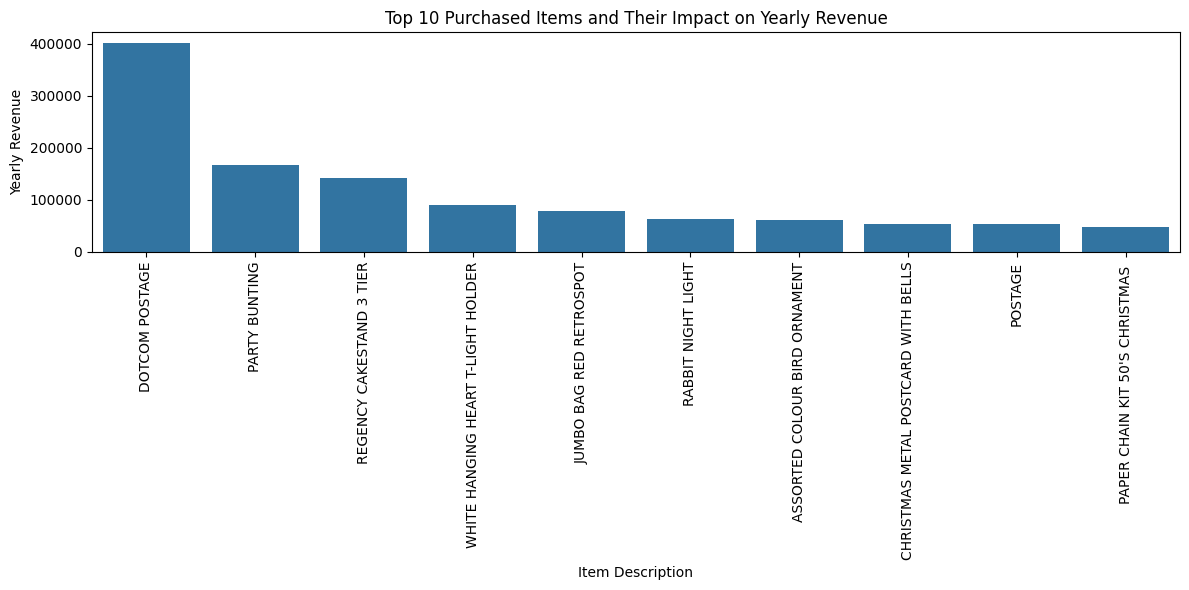

In [ ]:
#Visualizing the query above(top 10 products with their imapct on revenue)
import matplotlib.pyplot as plt
import seaborn as sns

query = '''
SELECT
    StockCode,
    Description,
    TotalQuantity,
    UnitPrice,
    ROUND(TotalQuantity * UnitPrice, 2) AS YearlyRevenue
FROM (
    SELECT
        StockCode,
        Description,
        SUM(Quantity) AS TotalQuantity,
        UnitPrice
    FROM retail
    GROUP BY StockCode
)
ORDER BY YearlyRevenue DESC
LIMIT 10
'''
df = pd.read_sql_query(query, conn)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Description', y='YearlyRevenue', data=df)
plt.xticks(rotation=90)
plt.xlabel('Item Description')
plt.ylabel('Yearly Revenue')
plt.title('Top 10 Purchased Items and Their Impact on Yearly Revenue')
plt.tight_layout()
plt.show()



In [ ]:
#analyzing the item that contributes most to the revenue
%%sql
SELECT * FROM retail where Description='DOTCOM POSTAGE' Group by Month LIMIT 10

   sqlite://
 * sqlite:///retail.db
Done.


index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month,Year
143057,548663,DOT,DOTCOM POSTAGE,1,4/1/2011 14:44,244.46,None,United Kingdom,244.5,April,11
286320,562024,DOT,DOTCOM POSTAGE,1,8/1/2011 16:07,142.94,None,United Kingdom,142.9,August,11
1814,536544,DOT,DOTCOM POSTAGE,1,12/1/2010 14:32,569.77,None,United Kingdom,569.8,December,10
78017,542794,DOT,DOTCOM POSTAGE,1,2/1/2011 10:56,86.77,None,United Kingdom,86.8,February,11
42979,540026,DOT,DOTCOM POSTAGE,1,1/4/2011 13:25,469.7,None,United Kingdom,469.7,January,11
246097,558680,DOT,DOTCOM POSTAGE,1,7/1/2011 11:19,64.88,None,United Kingdom,64.9,July,11
209927,555275,DOT,DOTCOM POSTAGE,1,6/1/2011 17:18,205.29,None,United Kingdom,205.3,June,11
106176,545315,DOT,DOTCOM POSTAGE,1,3/1/2011 14:14,75.58,None,United Kingdom,75.6,March,11
173679,551718,DOT,DOTCOM POSTAGE,1,5/3/2011 16:06,160.37,None,United Kingdom,160.4,May,11
435443,574074,DOT,DOTCOM POSTAGE,1,11/2/2011 15:33,371.65,None,United Kingdom,371.7,November,11


The most purchased item was purchased various months throughout the year. It's very popular in the United Kingdom which makes sense as the item seems to be a postage fee

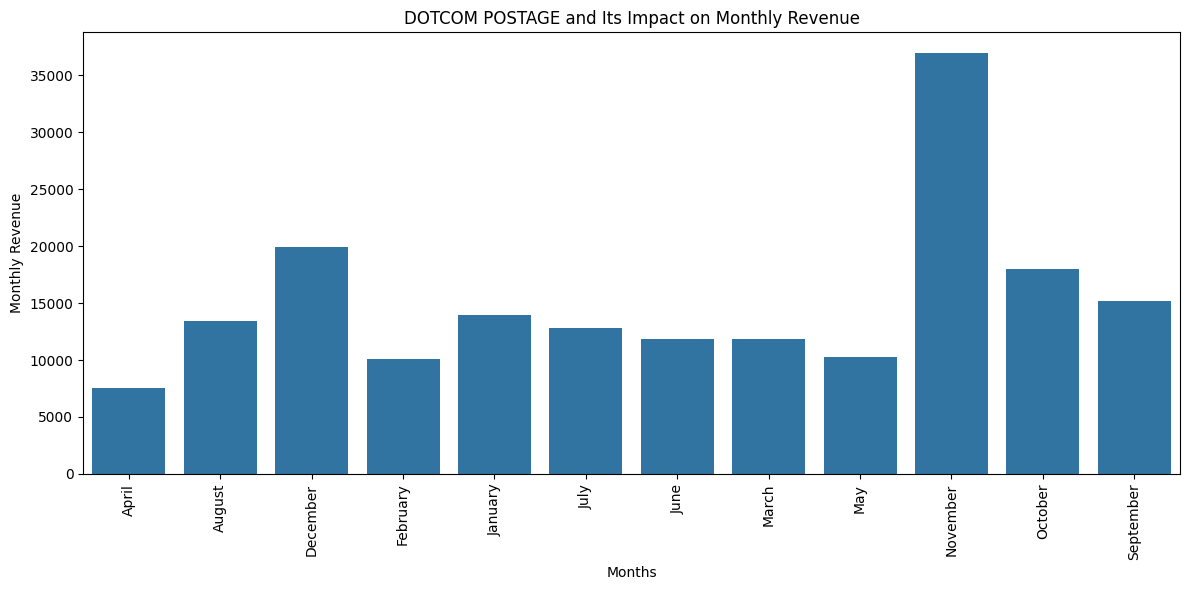

In [ ]:
#Visualizing the most purchased item
import matplotlib.pyplot as plt
import seaborn as sns

# Execute the SQL query to get the top purchased item
query = '''
SELECT SUM(Total) AS 'Total Sum', Month
FROM retail
WHERE Description ='DOTCOM POSTAGE'
GROUP BY Month
'''
df = pd.read_sql_query(query, conn)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Total Sum', data=df)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Monthly Revenue')
plt.title('DOTCOM POSTAGE and Its Impact on Monthly Revenue')
plt.tight_layout()
plt.show()


From the visualization above, November being the month with the highest purchases could be due to prepartion of the festivity period. People could be shipping various items such as gifts, Christmas Cards to friends and family.

In [ ]:
#Analysing the second most purchased item
%%sql
SELECT * FROM retail where Description='PARTY BUNTING' Group by Month LIMIT 10

   sqlite://
 * sqlite:///retail.db
Done.


index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month,Year
142271,548565,47566,PARTY BUNTING,12,4/1/2011 10:23,4.95,16180.0,United Kingdom,59.4,April,2011
286014,561969,47566,PARTY BUNTING,6,8/1/2011 13:31,4.95,17757.0,United Kingdom,29.7,August,2011
517477,580058,47566,PARTY BUNTING,4,12/1/2011 13:19,4.95,14367.0,United Kingdom,19.8,December,2011
77735,542780,47566,PARTY BUNTING,10,2/1/2011 9:38,4.65,17675.0,United Kingdom,46.5,February,2011
42842,540023,47566,PARTY BUNTING,60,1/4/2011 12:58,3.75,15039.0,United Kingdom,225.0,January,2011
245995,558642,47566,PARTY BUNTING,8,7/1/2011 9:47,4.95,17667.0,United Kingdom,39.6,July,2011
209036,555157,47566,PARTY BUNTING,8,6/1/2011 7:38,4.95,15643.0,United Kingdom,39.6,June,2011
105468,545226,47566,PARTY BUNTING,4,3/1/2011 9:33,4.95,12428.0,Finland,19.8,March,2011
172182,551520,47566,PARTY BUNTING,3,5/1/2011 11:55,4.95,13301.0,United Kingdom,14.9,May,2011
431920,573772,47566,PARTY BUNTING,1,11/1/2011 10:16,4.95,17377.0,United Kingdom,5.0,November,2011


The second most purchased item has more spread as it was purchased internationally and various times throughout the year.

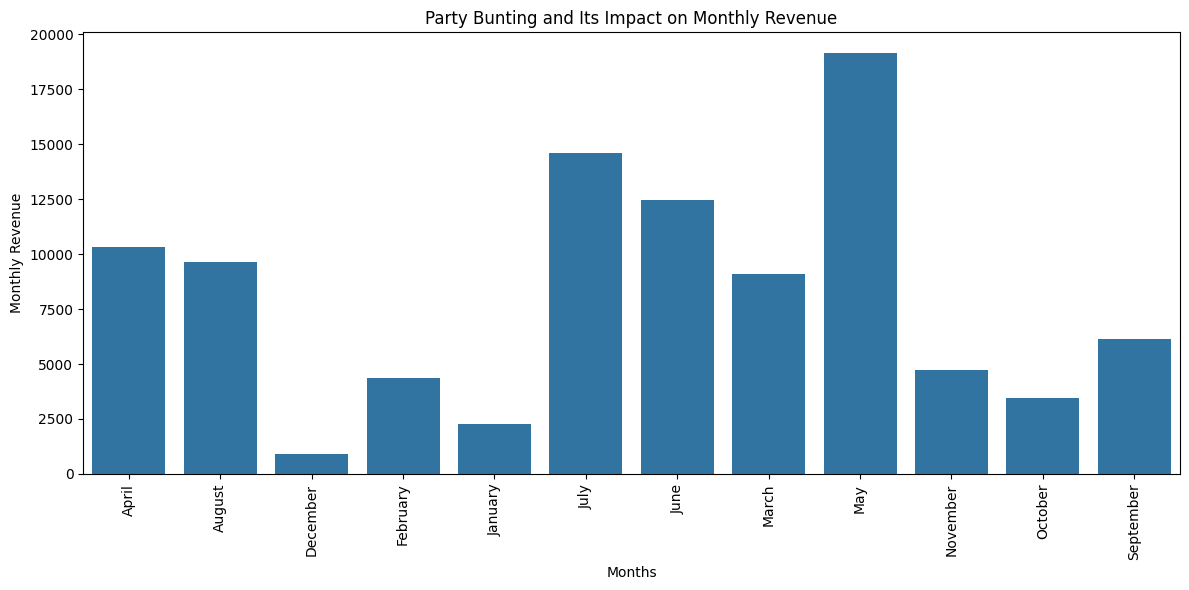

In [ ]:
#Visualizing the second most purchased item
import matplotlib.pyplot as plt
import seaborn as sns

# Execute the SQL query to get the top purchased items
query = '''
SELECT SUM(Total) AS 'Total Sum', Month FROM retail where Description='PARTY BUNTING' GROUP BY Month
'''
df = pd.read_sql_query(query, conn)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Total Sum', data=df)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Monthly Revenue')
plt.title('Party Bunting and Its Impact on Monthly Revenue')
plt.tight_layout()
plt.show()



May being the month with the highest purchase of party bunting could suggest that many people had celebrations in the month of May.

Next, I'll analyze the correlation between month, year and the most purchases to identify if there's a trend

In [ ]:
#Cleaning the year column
%%sql
UPDATE retail SET Year = 2010 WHERE Year = 10;
UPDATE retail SET Year = 2011 WHERE Year = 11

   sqlite://
 * sqlite:///retail.db
39254 rows affected.
456586 rows affected.


[]

In [ ]:
%%sql
SELECT Month,Year,  ROUND(SUM(Total), 2) AS 'Monthly Sales'
FROM retail
GROUP BY Month, Year
ORDER BY  ROUND(SUM(Total),2);


   sqlite://
 * sqlite:///retail.db
Done.


Month,Year,Monthly Sales
December,2011,433943.2
April,2011,493500.2
February,2011,498336.1
January,2011,560319.0
July,2011,681665.1
March,2011,683621.2
June,2011,691468.3
August,2011,705101.3
May,2011,723666.5
December,2010,749370.9


There's only one record for the year 2010 (which is in the month of December) so the year 2010 can be dropped

In [ ]:
#Monthly sales for 2011
%%sql
DELETE FROM retail WHERE Year = 2010;
SELECT Month,Year,  ROUND(SUM(Total), 2) AS 'Monthly Sales'
FROM retail
GROUP BY Month, Year
ORDER BY  ROUND(SUM(Total),2) DESC


   sqlite://
 * sqlite:///retail.db
0 rows affected.
Done.


Month,Year,Monthly Sales
November,2011,1462756.3
October,2011,1071350.2
September,2011,1020111.0
May,2011,723666.5
August,2011,705101.3
June,2011,691468.3
March,2011,683621.2
July,2011,681665.1
January,2011,560319.0
February,2011,498336.1


Description      Month  DOTCOM POSTAGE  PARTY BUNTING
0                April          7535.5        10325.7
1               August         13400.8         9656.7
2             December         19873.0          918.9
3             February         10060.9         4348.9
4              January         13918.8         2290.1
5                 July         12841.4        14577.7
6                 June         11849.0        12459.4
7                March         11829.9         9099.6
8                  May         10229.8        19125.8
9             November         36905.9         4712.4
10             October         17955.4         3462.8
11           September         15177.7         6134.7


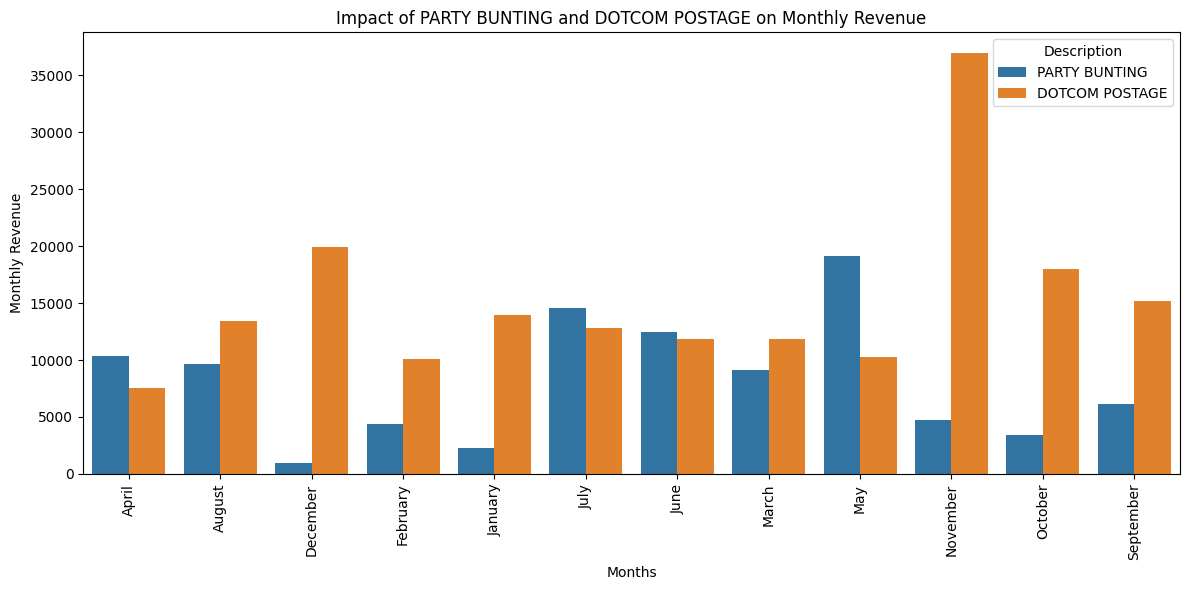

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
query = '''
SELECT SUM(Total) AS 'Total_Sum', Month, Description
FROM retail
WHERE Description IN ('PARTY BUNTING', 'DOTCOM POSTAGE')
GROUP BY Month, Description
'''
df = pd.read_sql_query(query, conn)

# Pivot the data to have a column for each Description
df_pivot = df.pivot(index='Month', columns='Description', values='Total_Sum').reset_index()

# Melt the DataFrame to a long format for seaborn
df_melted = pd.melt(df_pivot, id_vars='Month', value_vars=['PARTY BUNTING', 'DOTCOM POSTAGE'],
                    var_name='Description', value_name='Total_Sum')
print(df_pivot)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Total_Sum', hue='Description', data=df_melted)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Monthly Revenue')
plt.title('Impact of PARTY BUNTING and DOTCOM POSTAGE on Monthly Revenue')
plt.tight_layout()
plt.show()

#CONCLUSION

The dataset is limited mainly to the year 2011, which restricts analysis to a single years trends and may not reflect broader, multi-year patterns. So, this analysis could be biased. Furthermore, November emerging as the month with the highest sales could be due to pre-Christmas shopping. September and October also showed high sales, possibly driven by Halloween sales or back-to-school promotions. These insights suggest that targeted promotions around these periods could be beneficial.  

My comprehensive analysis of e-commerce sales data demonstrates a strong ability to use SQL for data extraction and for detailed analysis. My visualizations reveal actionable insights into sales trends, and I've provided a clear interpretation of the data's implications. My analytical skills and ability to draw meaningful conclusions from data will add significant value to your team. I am adept at transforming raw data into strategic insights and actionable recommendations, making me a strong candidate for this role. Thank you for your consideration, and I look forward to speaking with you further.

Sincerely,

Deborah Atsagbede

atsagbedeg@gmail.com | www.linkedin.com/in/gbone-atsagbede
